- build data with s = linspace(-.9,.9,100) with 100*40 points 
- save data to csv
- use R to classify 

In [5]:
from NS_backflow_server import *
import numpy as np

In [6]:
diam_narrow=0.03
s = 0.

In [7]:
artery = Artery(diam_steno_vessel, diam_narrow, theta_steno, diam_healthy_vessel, theta_healthy)
mesh = artery.mesh(mesh_precision)
File('NSdata/artery.xml.gz') << mesh
# mesh = Mesh('NSdata/artery.xml.gz')

# Solver
T = .460
num_steps = 250
flag_movie = False
flag_cleanup = True
flag_diagnosis = True
flag_tqdm = False
flag_IPCS = True #splitting scheme
with_teman = False
with_bf_est = False
freq_plot = 1
uname = 'NSdata/u_series'
pname = 'NSdata/p_series'

In [26]:
u,p= compute_NSsolution_IPCS(mesh,
T=T,
num_steps=num_steps,
mu=mu,
rho=rho,
c=c,
Rd=Rd,
Rp=Rp,
p_windkessel_1=p_windkessel_1,
p_windkessel_2=p_windkessel_2,
u0=u0,
s = s,
uname = uname,
pname = pname,
flag_tqdm = False)

KeyboardInterrupt: 

Plotting... t = 0.4600: : 0.46000000000000135it [00:48, 90.00s/it]                          


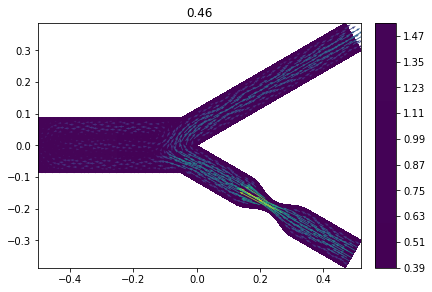

In [11]:
writename = './output/output.mp4'
diagnoses, files = make_movie_IPCS(mesh, 
            T,
            num_steps,
            uname = uname,
            pname = pname,
            writename = writename)
cleanup(files)

In [12]:
import io
import base64
from IPython.display import HTML

video = io.open(writename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))
# os.remove(writename)

In [13]:
# cleanup(files)
# writename = './output/output.mp4'
os.remove(writename)

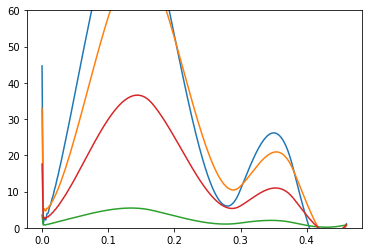

In [8]:
plot_diagnosis(T,num_steps,diagnoses,fname = 'diagnoses.pdf')

In [66]:
def find_gridpoints(x,X,y,Y,nx = 10,ny = 4):
    xx = np.linspace(x, X, nx)
    yy = np.linspace(y, Y, ny)
    XX, YY = np.meshgrid(xx, yy)
    XX = XX.reshape(1,-1).tolist()[0]
    YY = YY.reshape(1,-1).tolist()[0]
    points = [np.array(i) for i in zip(XX,YY)]
    return points

def diagnosis_IPCS(mesh, 
                    T=T,
                    uname = 'NSdata/u_series',
                    pname = 'NSdata/p_series',
                    writename = './output/output.mp4',
                    x=-.4,X=-.2,y=-.03,Y=.03):
    timeseries_u = TimeSeries(uname)
    timeseries_p = TimeSeries(pname)
    V,Q = compute_space_IPCS(mesh)
    u = Function(V)
    p = Function(Q)
    t = T
    # Read velocity from file
    timeseries_u.retrieve(u.vector(), t)
    timeseries_p.retrieve(p.vector(), t)
    # diagnosis 
    upoints = find_gridpoints(x,X,y,Y)
    udata = eval_fun(u,upoints)
    np.savetxt('tmp/s=%.5f,diam_narrow=%2f.csv' % (s,diam_narrow), udata, delimiter=",")
#     pbar.close()
    movie(writename)
    return udata,s,diam_narrow

In [2]:
diam_narrow = 0.03
# diam_narrow = 0.
artery = Artery(diam_steno_vessel, diam_narrow, 
                theta_steno, diam_healthy_vessel, theta_healthy,length0,length, length_steno)
mesh = artery.mesh(mesh_precision)


In [4]:
# diam_narrow_diam_narrow=[0.03,0.]
ss = np.linspace(-.9,.9,10).tolist()

for i in ss:
#     print('s=',i)
    u,p= compute_NSsolution_IPCS(mesh,
                                T=T,
                                num_steps=num_steps,
                                mu=mu,
                                rho=rho,
                                c=c,
                                Rd=Rd,
                                Rp=Rp,
                                p_windkessel_1=p_windkessel_1,
                                p_windkessel_2=p_windkessel_2,
                                u0=u0,
                                s = i,#
                                uname = uname,
                                pname = pname,
                                flag_movie=flag_movie,
                                flag_tqdm = False)
    udata,symm,diam_narrow=diagnosis_IPCS(mesh,T,s = i)
    print('completed:','tmp/s=%.1f,diam_narrow=%2f.csv' % (i,diam_narrow))

TypeError: diagnosis_IPCS() got an unexpected keyword argument 's'

In [19]:
'tmp/s=%.1f,diam_narrow=%2f.csv' % (s,diam_narrow)

'tmp/s=-0.7,diam_narrow=0.030000.csv'